# INTRODUCTION
This noteboook imports the merged and preprocessed data for daily flights and weather produced by "1. daily_import_merge_engineer.ipynb". Exploratory data analysis is performed in this notebook. 

## Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data & column groups

In [2]:
DAILY_DATA_PATH = "data.v3/daily" 

df = pd.read_parquet(os.path.join(DAILY_DATA_PATH, "daily_flights_and_weather_merged.parquet"))

# Flights column groups
flights_terminal_cols = ['flights_arr_A', 'flights_arr_B', 'flights_arr_C', 'flights_arr_D', 'flights_arr_E',
                         'flights_dep_A', 'flights_dep_B', 'flights_dep_C', 'flights_dep_D', 'flights_dep_E']

flights_non_terminal_cols = ['flights_total', 'flights_cancel', 'flights_delay', 'flights_ontime',
                             'flights_arr_ontime', 'flights_arr_delay', 'flights_arr_cancel',
                             'flights_dep_ontime', 'flights_dep_delay', 'flights_dep_cancel']

flights_percentage_cols = ['flights_cancel_pct', 'flights_delay_pct', 'flights_ontime_pct',
                            'flights_arr_delay_pct', 'flights_arr_ontime_pct', 'flights_arr_cancel_pct',
                            'flights_dep_delay_pct', 'flights_dep_ontime_pct', 'flights_dep_cancel_pct']

# Date column groups
date_cols = ['date', 'covid', 'ordinal_date', 'year', 'month', 'day_of_month', 'day_of_week', 'season', 'holiday', 'halloween', 'xmas_eve', 'new_years_eve', 'jan_2', 'jan_3', 'day_before_easter', 'days_until_xmas', 'days_until_thanksgiving', 'days_until_july_4th', 'days_until_labor_day', 'days_until_memorial_day']

# Weather column groups
weather_cols = ['wx_temperature_max', 'wx_temperature_min', 'wx_apcp', 'wx_prate', 'wx_asnow', 'wx_frozr', 'wx_vis', 'wx_gust', 'wx_maxref', 'wx_cape', 'wx_lftx', 'wx_wind_speed', 'wx_wind_direction']

# Lag column groups
lag_cols =  ['flights_total_lag_1', 'flights_total_lag_2', 'flights_total_lag_3', 'flights_total_lag_4', 'flights_total_lag_5', 'flights_total_lag_6', 'flights_total_lag_7', 'flights_cancel_lag_1', 'flights_cancel_lag_2', 'flights_cancel_lag_3', 'flights_cancel_lag_4', 'flights_cancel_lag_5', 'flights_cancel_lag_6', 'flights_cancel_lag_7']

# EXPLORATORY DATA ANALYSIS

## Total flights by day for each month

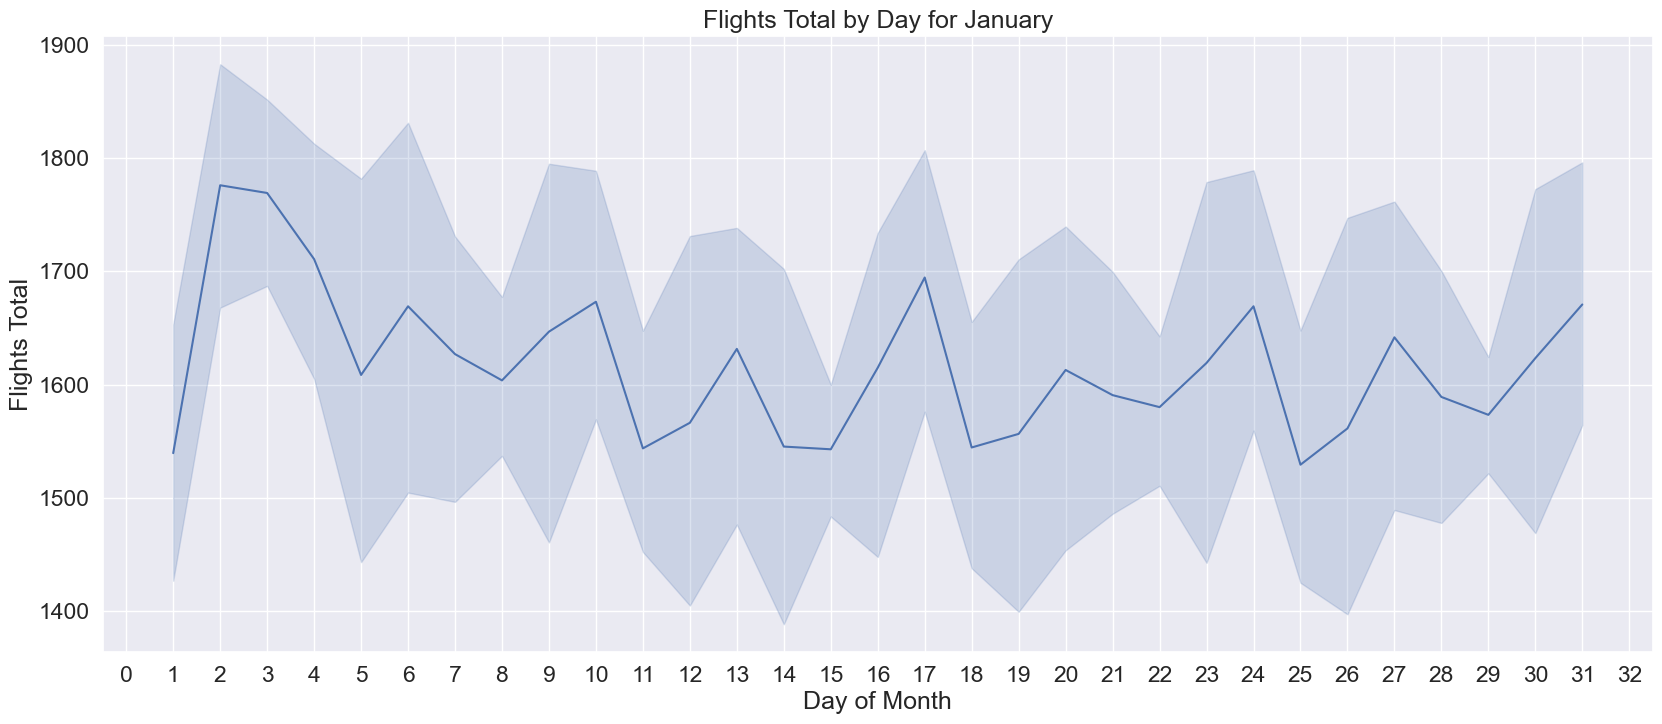

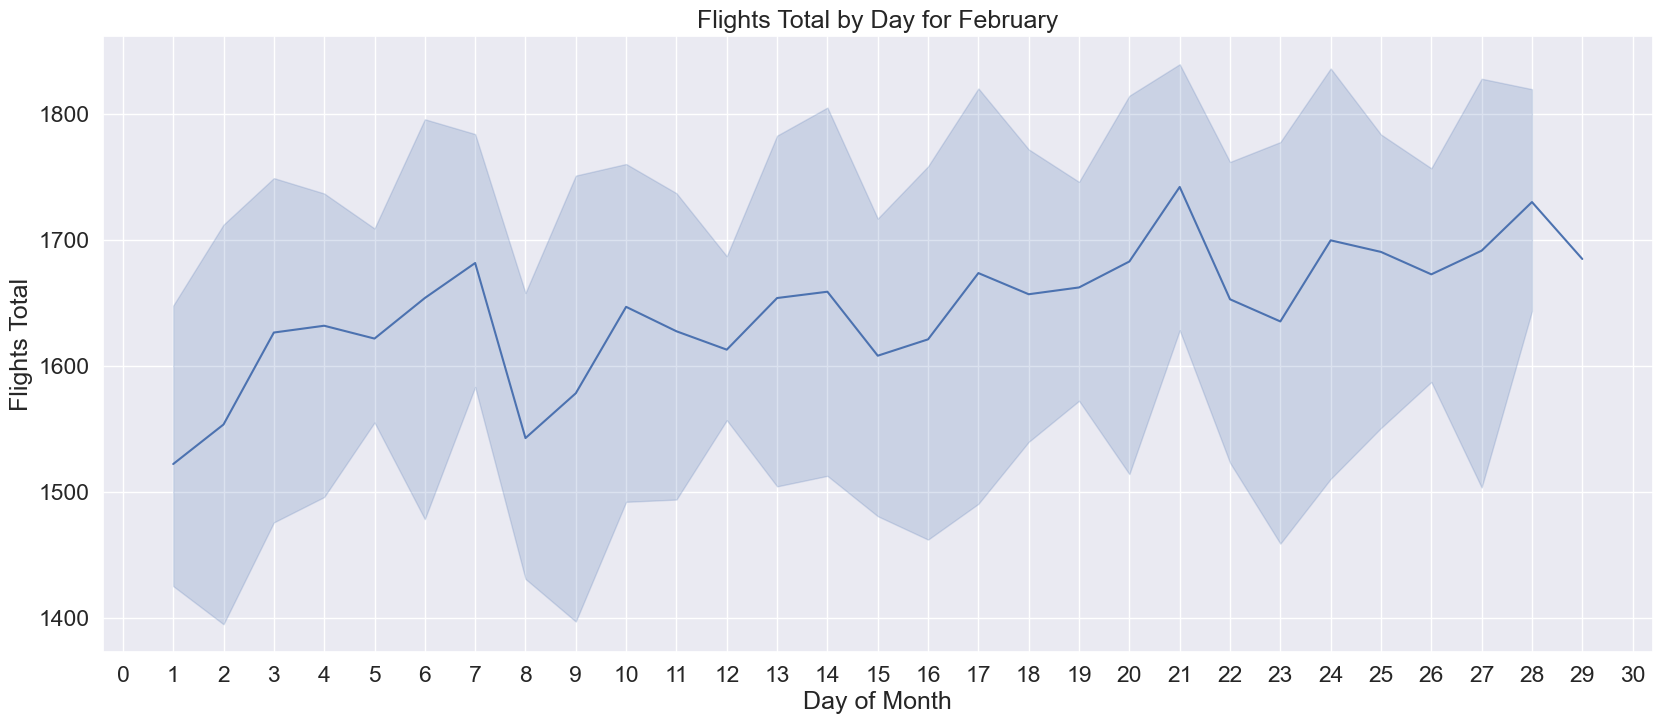

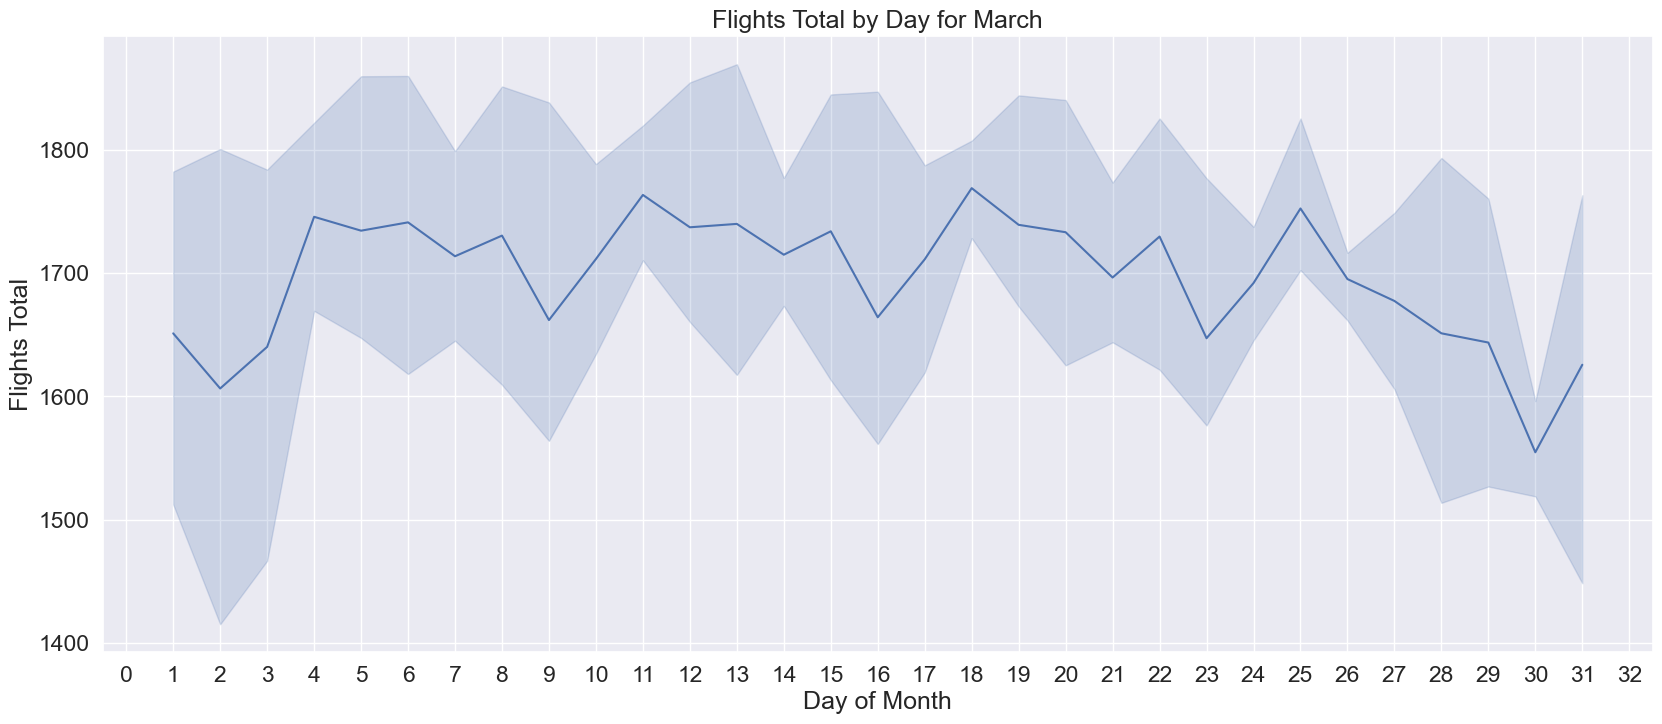

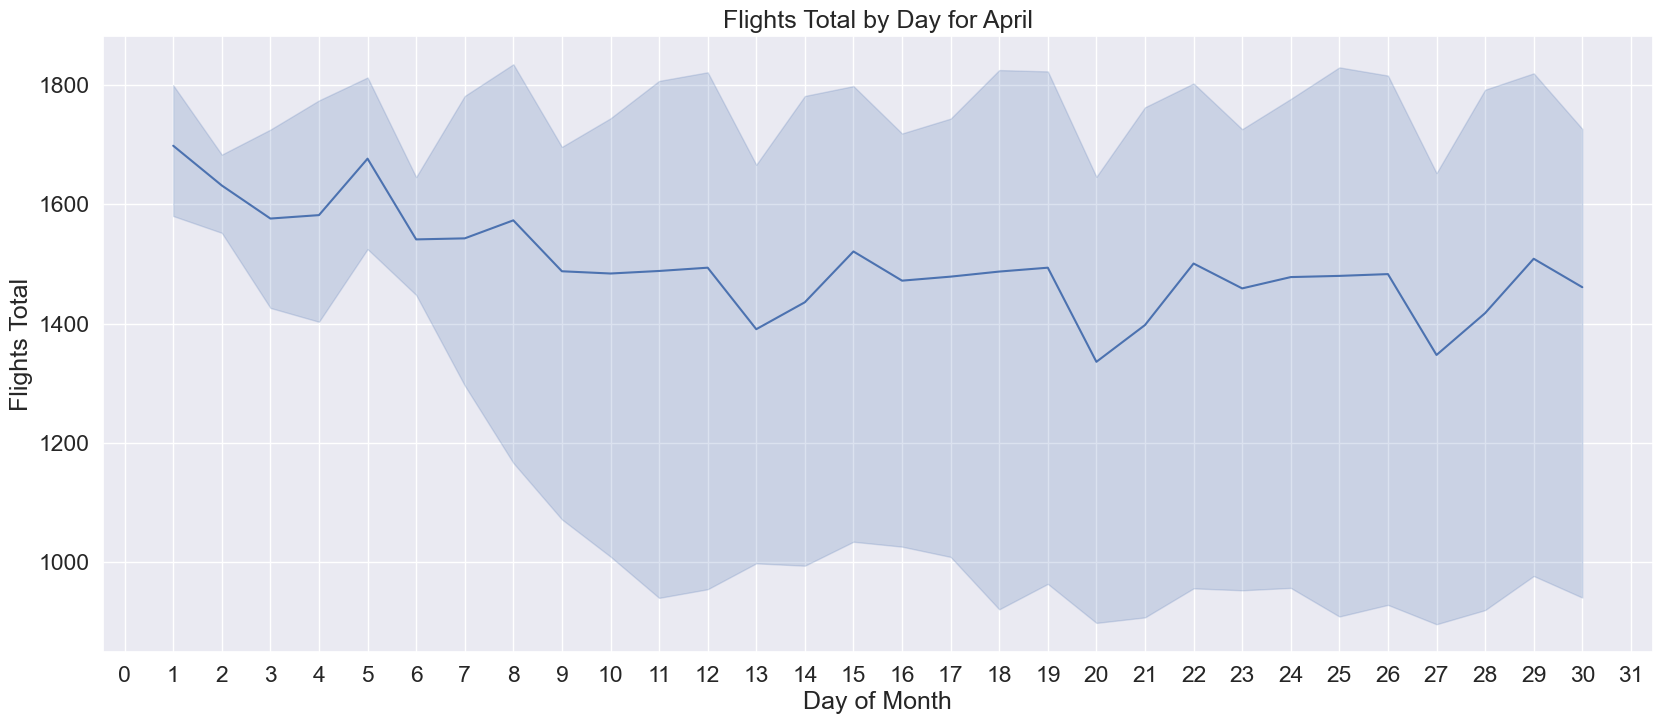

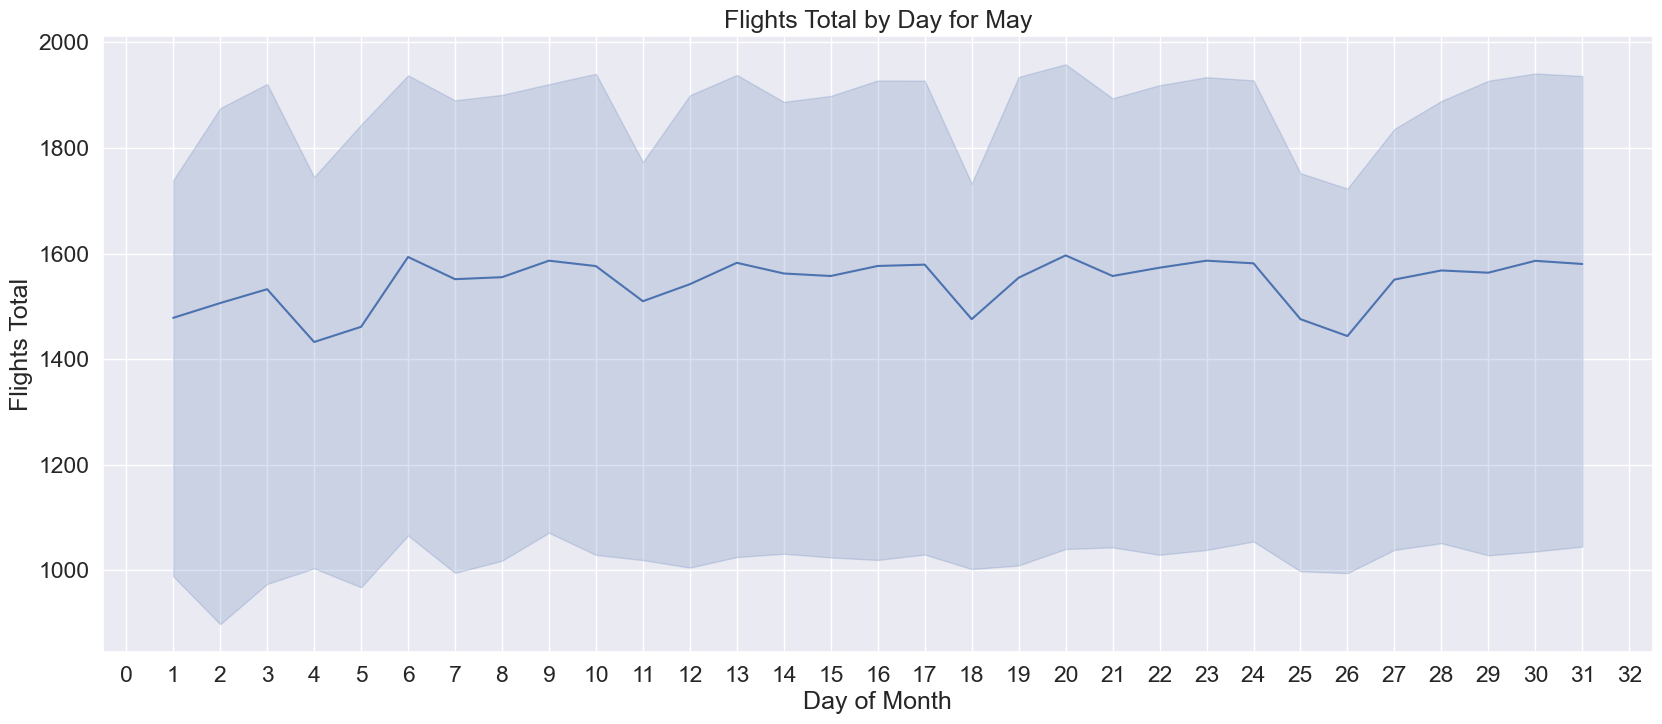

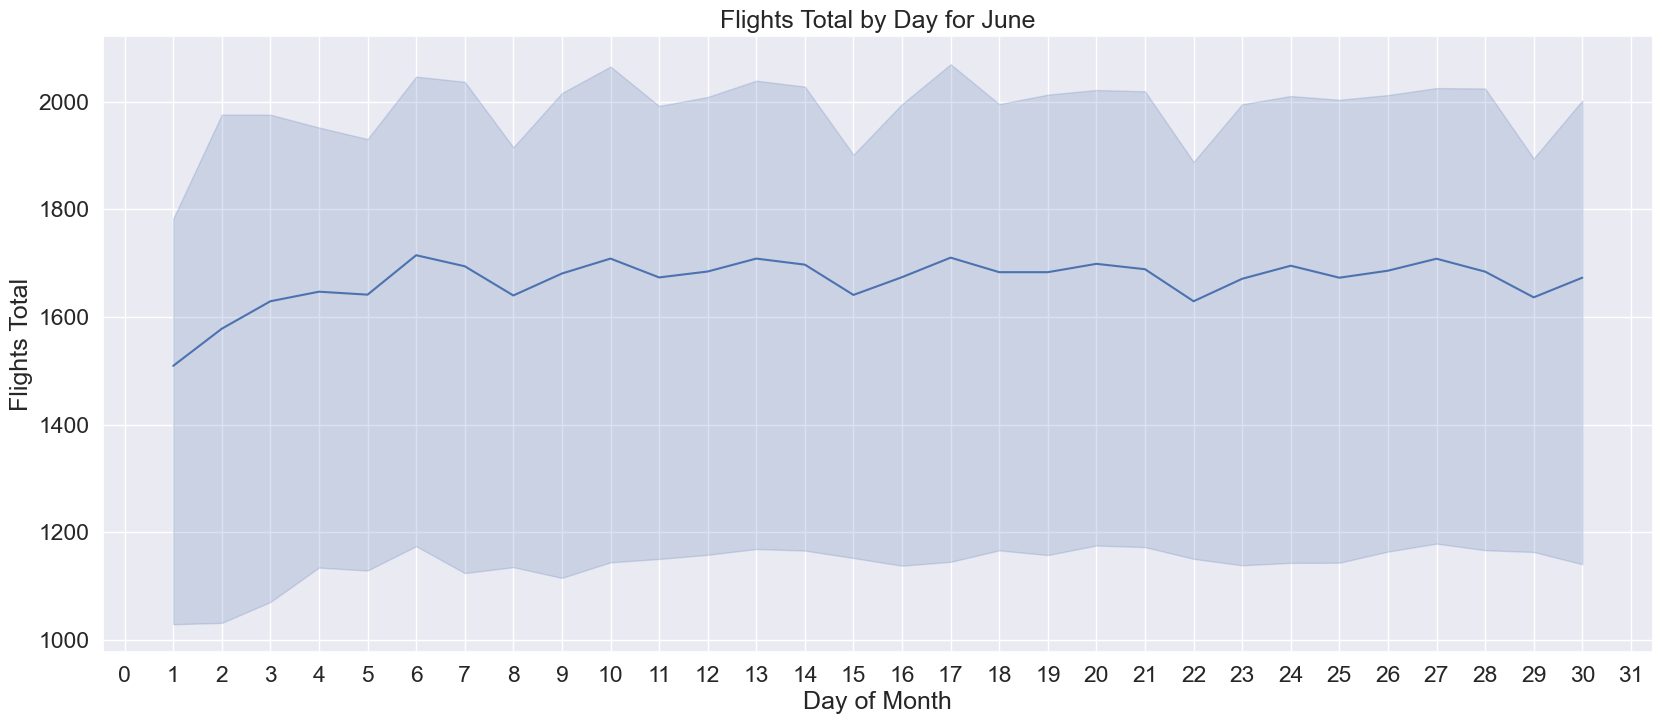

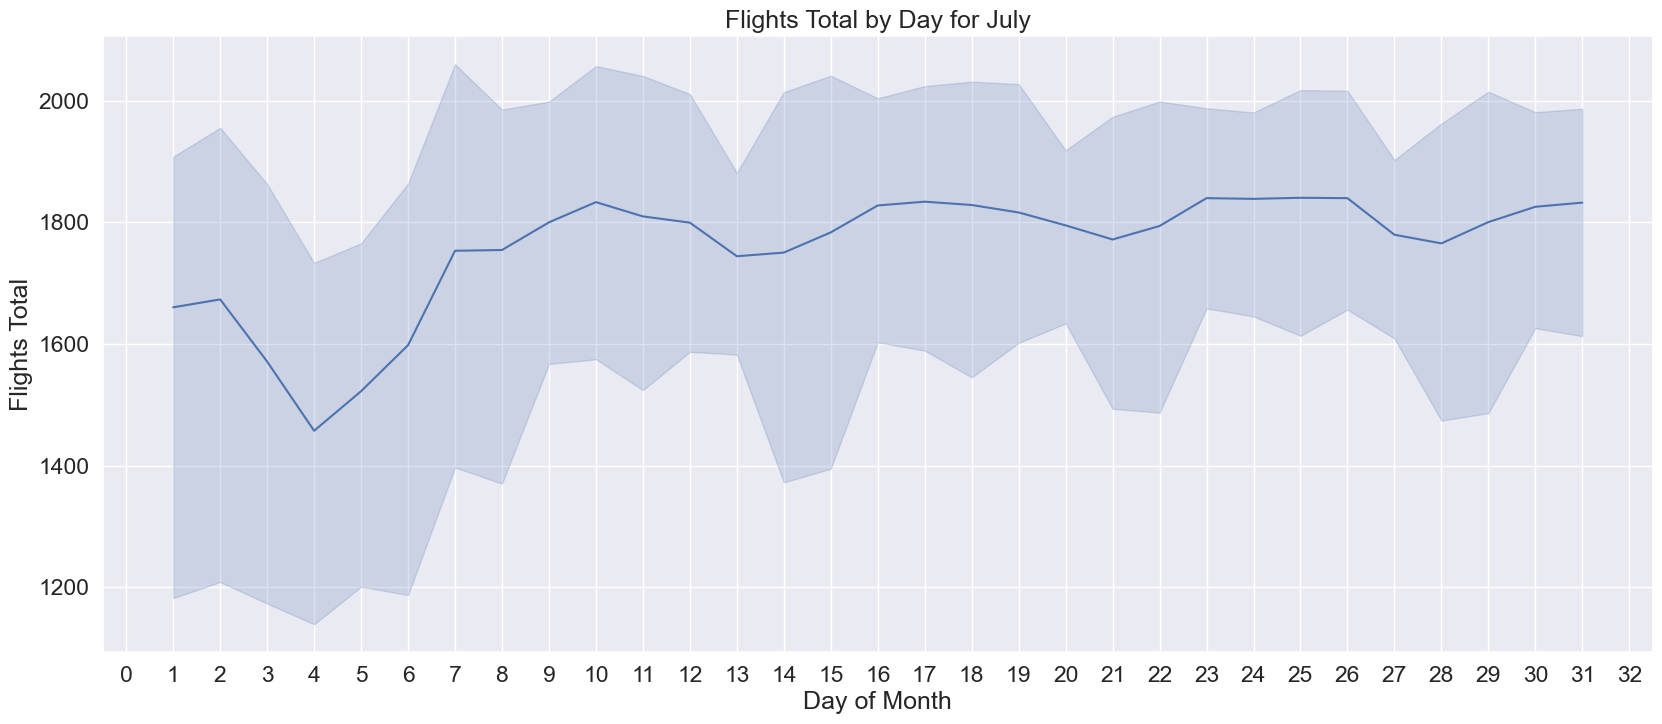

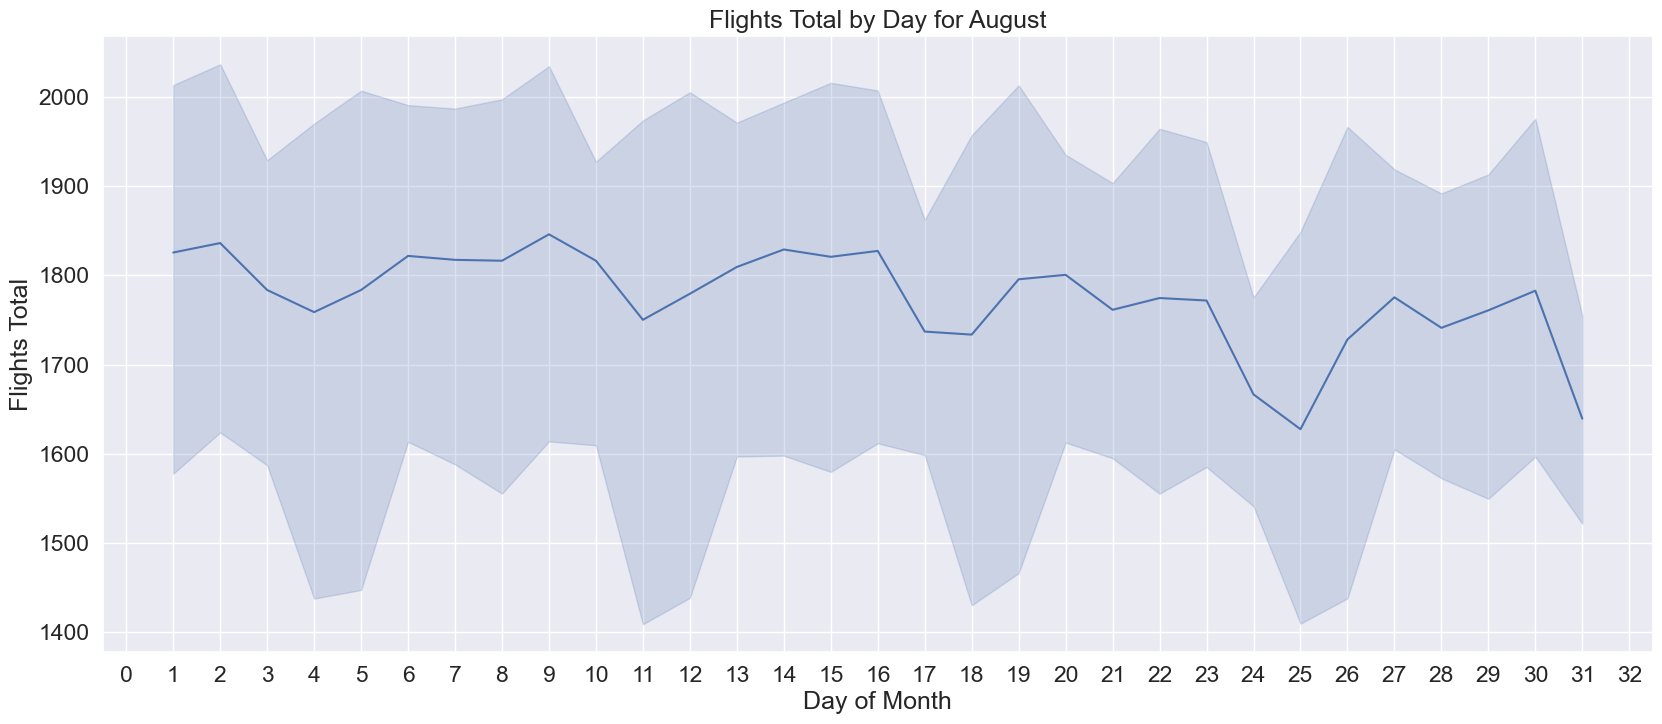

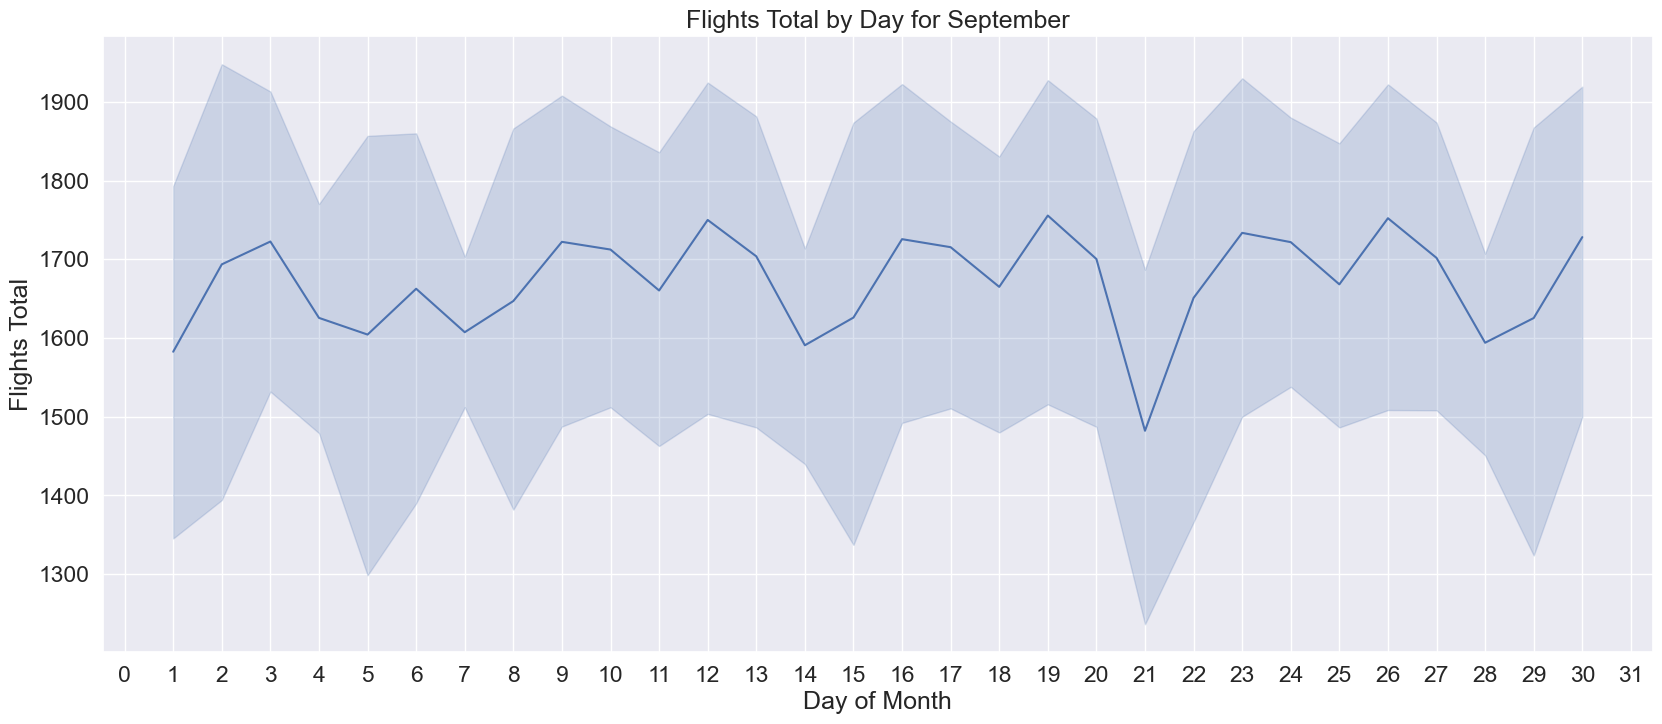

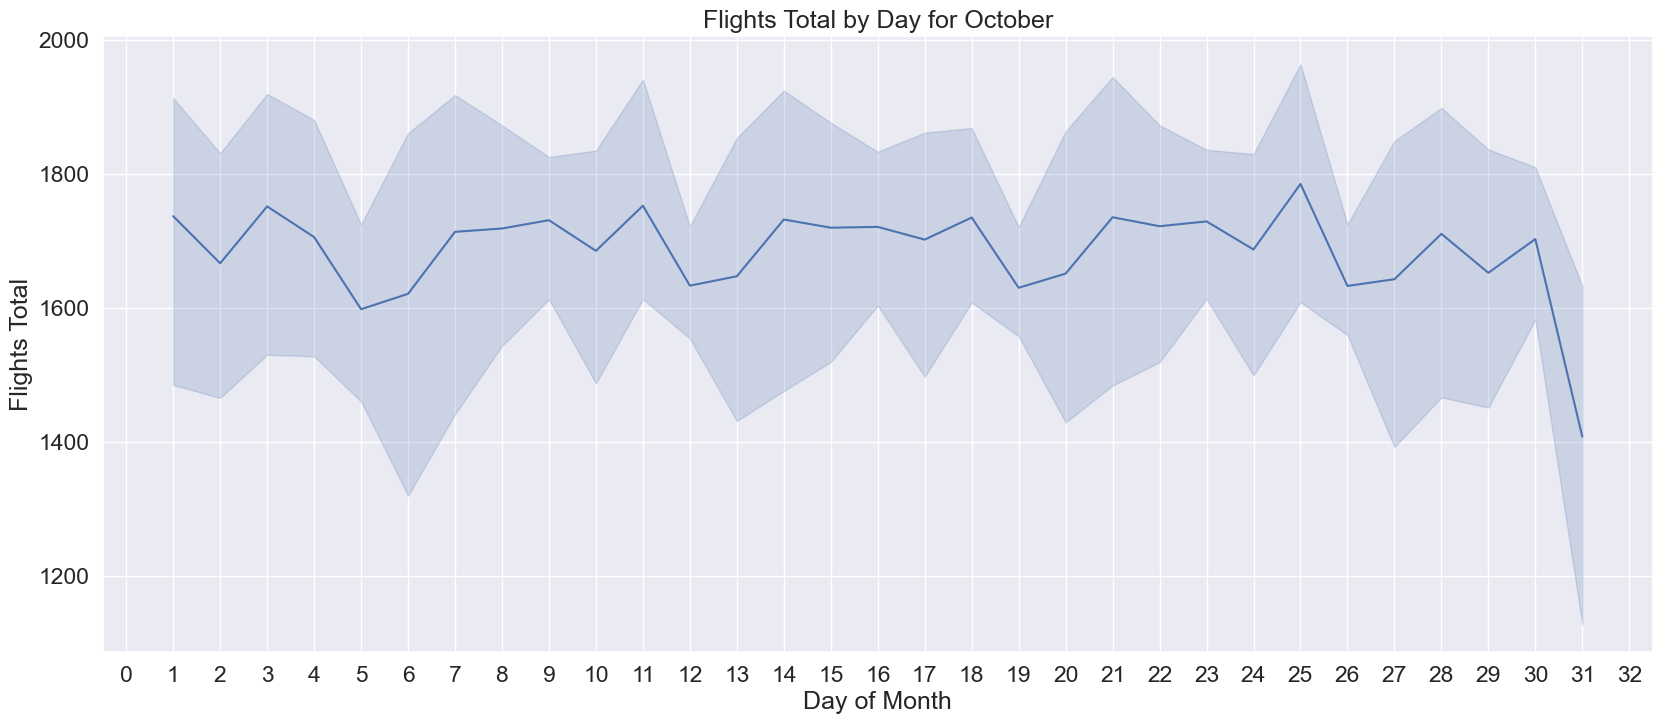

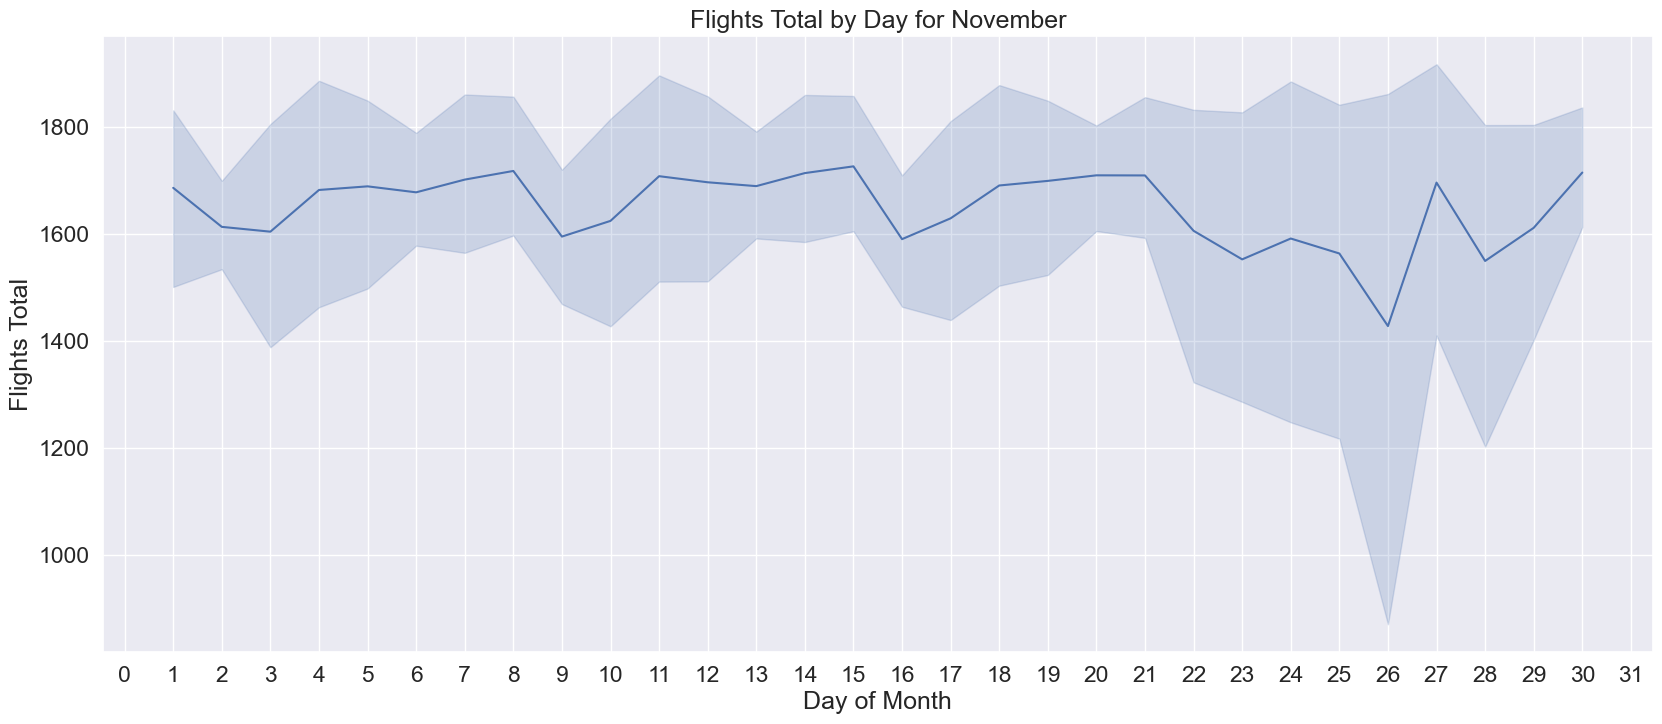

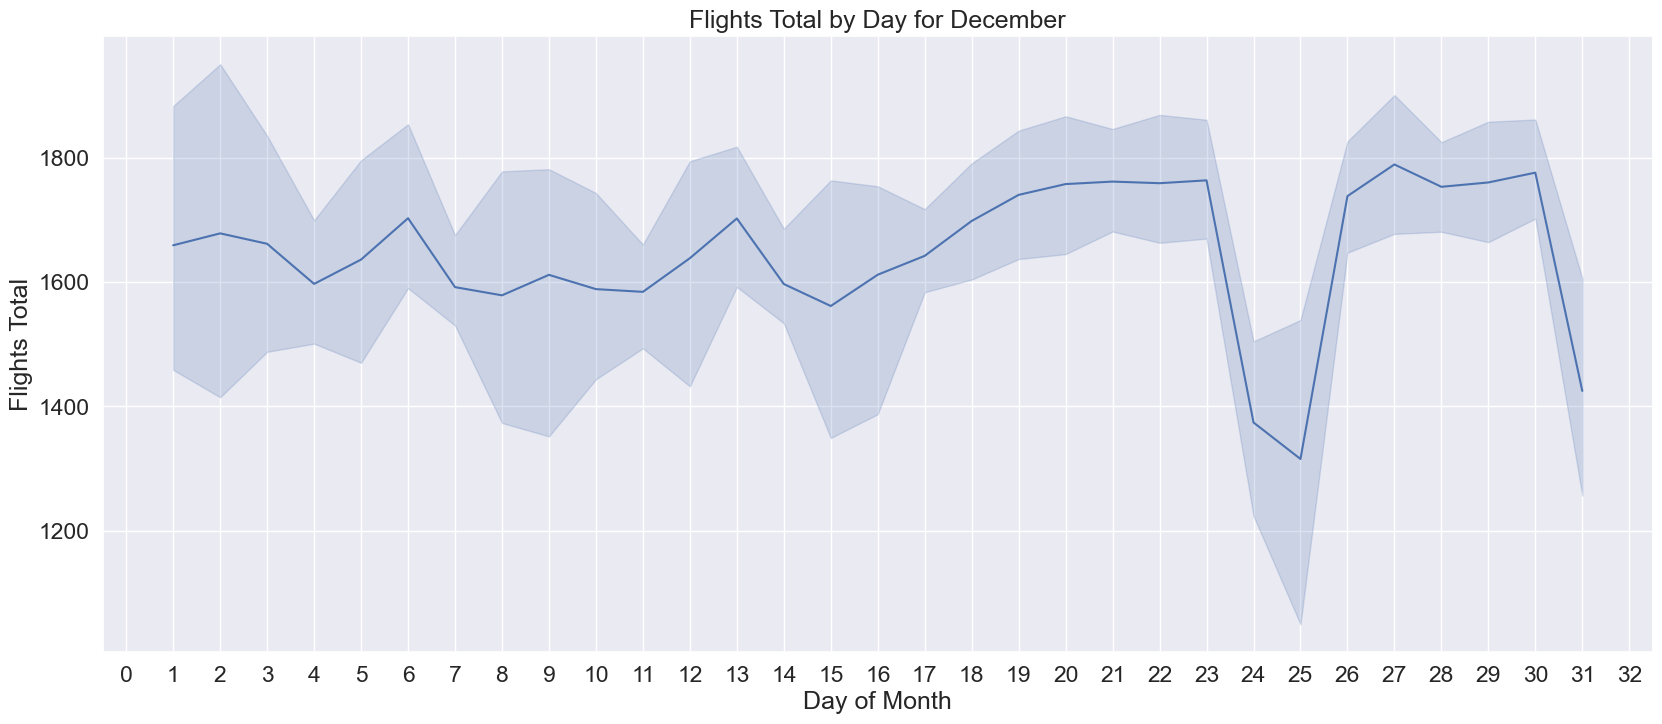

In [3]:

# Pointrange plot of the mean and standard deviation of flights_total by day for December
import matplotlib.ticker as ticker

for month in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']:
    sns.set_theme(rc={'figure.figsize':(20,8)})
    sns.set_theme(font_scale=1.5)
    sns.lineplot(data=df[(df['month'] == month)], x="day_of_month", y="flights_total")
    plt.title(f'Flights Total by Day for {month}')
    plt.xlabel('Day of Month')
    plt.ylabel('Flights Total')
    # Setting x-axis major ticks to each day
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.show()


## Flights and weather correlations

In [4]:
# Get lists of weather features sorted by Pearson correlation coefficient for correlation with flights_total, flights_cancel, flights_delay, and flights_ontime
weather_cols_total_corr = df[['flights_total'] + weather_cols].corr(method = 'spearman')['flights_total'].sort_values(ascending=False)
weather_cols_cancel_corr = df[['flights_cancel'] + weather_cols].corr(method = 'spearman')['flights_cancel'].sort_values(ascending=False)
weather_cols_delay_corr = df[['flights_delay'] + weather_cols].corr(method = 'spearman')['flights_delay'].sort_values(ascending=False)
weather_cols_ontime_corr = df[['flights_ontime'] + weather_cols].corr(method = 'spearman')['flights_ontime'].sort_values(ascending=False)

# Combine the three lists of correlations into a dataframe
weather_cols_corr = pd.concat([weather_cols_total_corr.drop(['flights_total'], axis=0),
                               weather_cols_cancel_corr.drop(['flights_cancel'], axis=0), 
                               weather_cols_delay_corr.drop(['flights_delay'], axis=0), 
                               weather_cols_ontime_corr.drop(['flights_ontime'], axis=0)], axis=1)

print(weather_cols_corr)

# Get the average absolute value of the correlation coefficients for each column

print("\nAverage absolute value correlation with weather features:\n", weather_cols_corr.abs().mean(axis=0))



                    flights_total  flights_cancel  flights_delay  \
wx_temperature_min       0.262753        0.072188       0.126683   
wx_temperature_max       0.218874       -0.029377      -0.042117   
wx_cape                  0.213871        0.191506       0.244203   
wx_vis                   0.063524       -0.177864      -0.209756   
wx_apcp                  0.009994        0.285349       0.309797   
wx_wind_direction        0.002613        0.015853       0.026593   
wx_prate                -0.019207        0.252918       0.289769   
wx_maxref               -0.021786        0.269684       0.297660   
wx_gust                 -0.037115        0.124035       0.137291   
wx_wind_speed           -0.050225        0.071265       0.073756   
wx_asnow                -0.085609        0.170197       0.056183   
wx_frozr                -0.093290        0.131685       0.055155   
wx_lftx                 -0.189835       -0.133529      -0.177331   

                    flights_ontime  
wx_tempera

## Heatmap of correlations for weather data

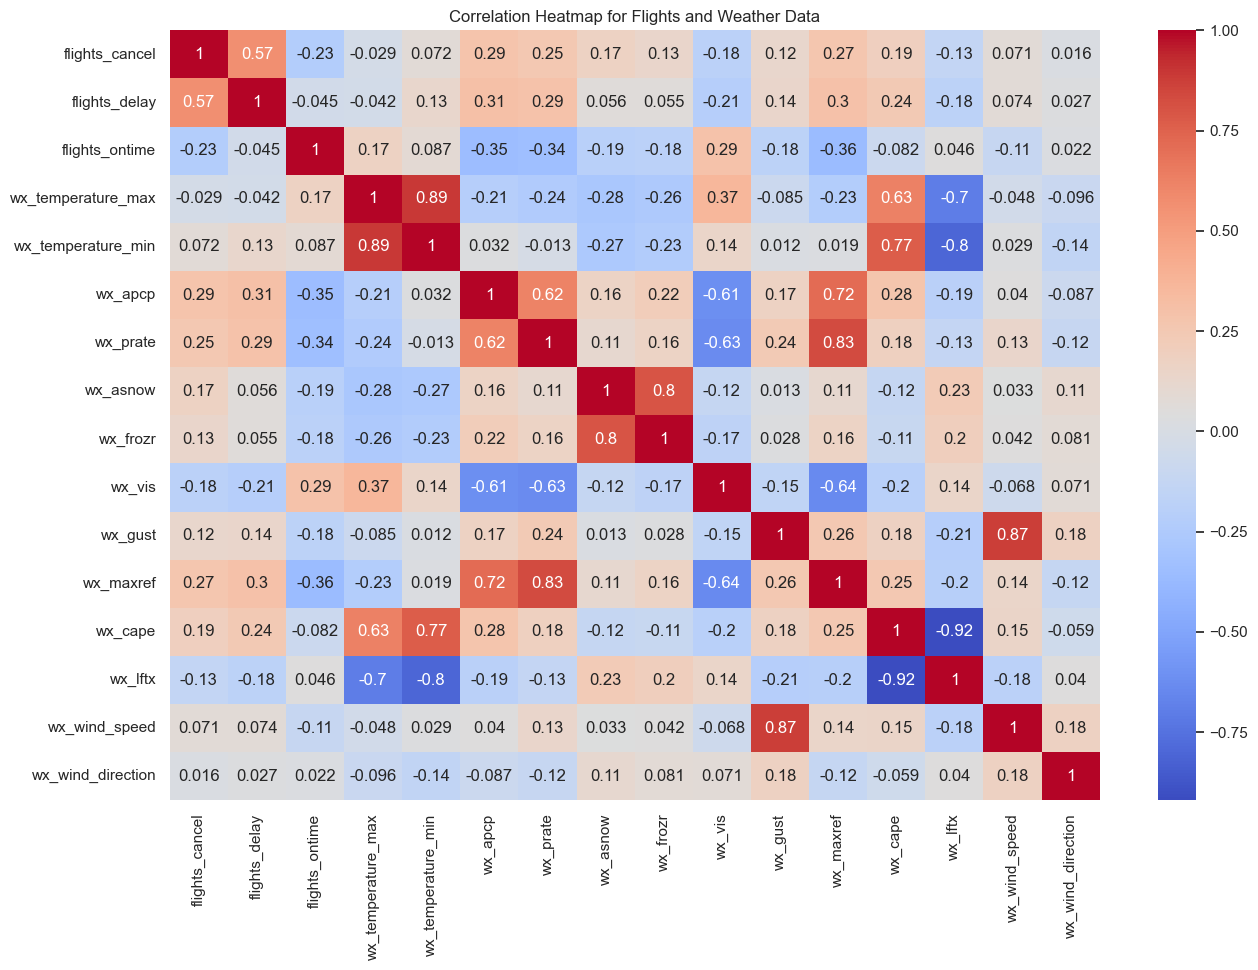

In [5]:
plt.figure(figsize=(15, 10))
sns.set_theme(font_scale=1.0)
sns.heatmap(df[['flights_cancel', 'flights_delay', 'flights_ontime'] + weather_cols].corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Flights and Weather Data')
plt.show()

## Correlation pairplot for weather and delayed departures

<Figure size 1000x1000 with 0 Axes>

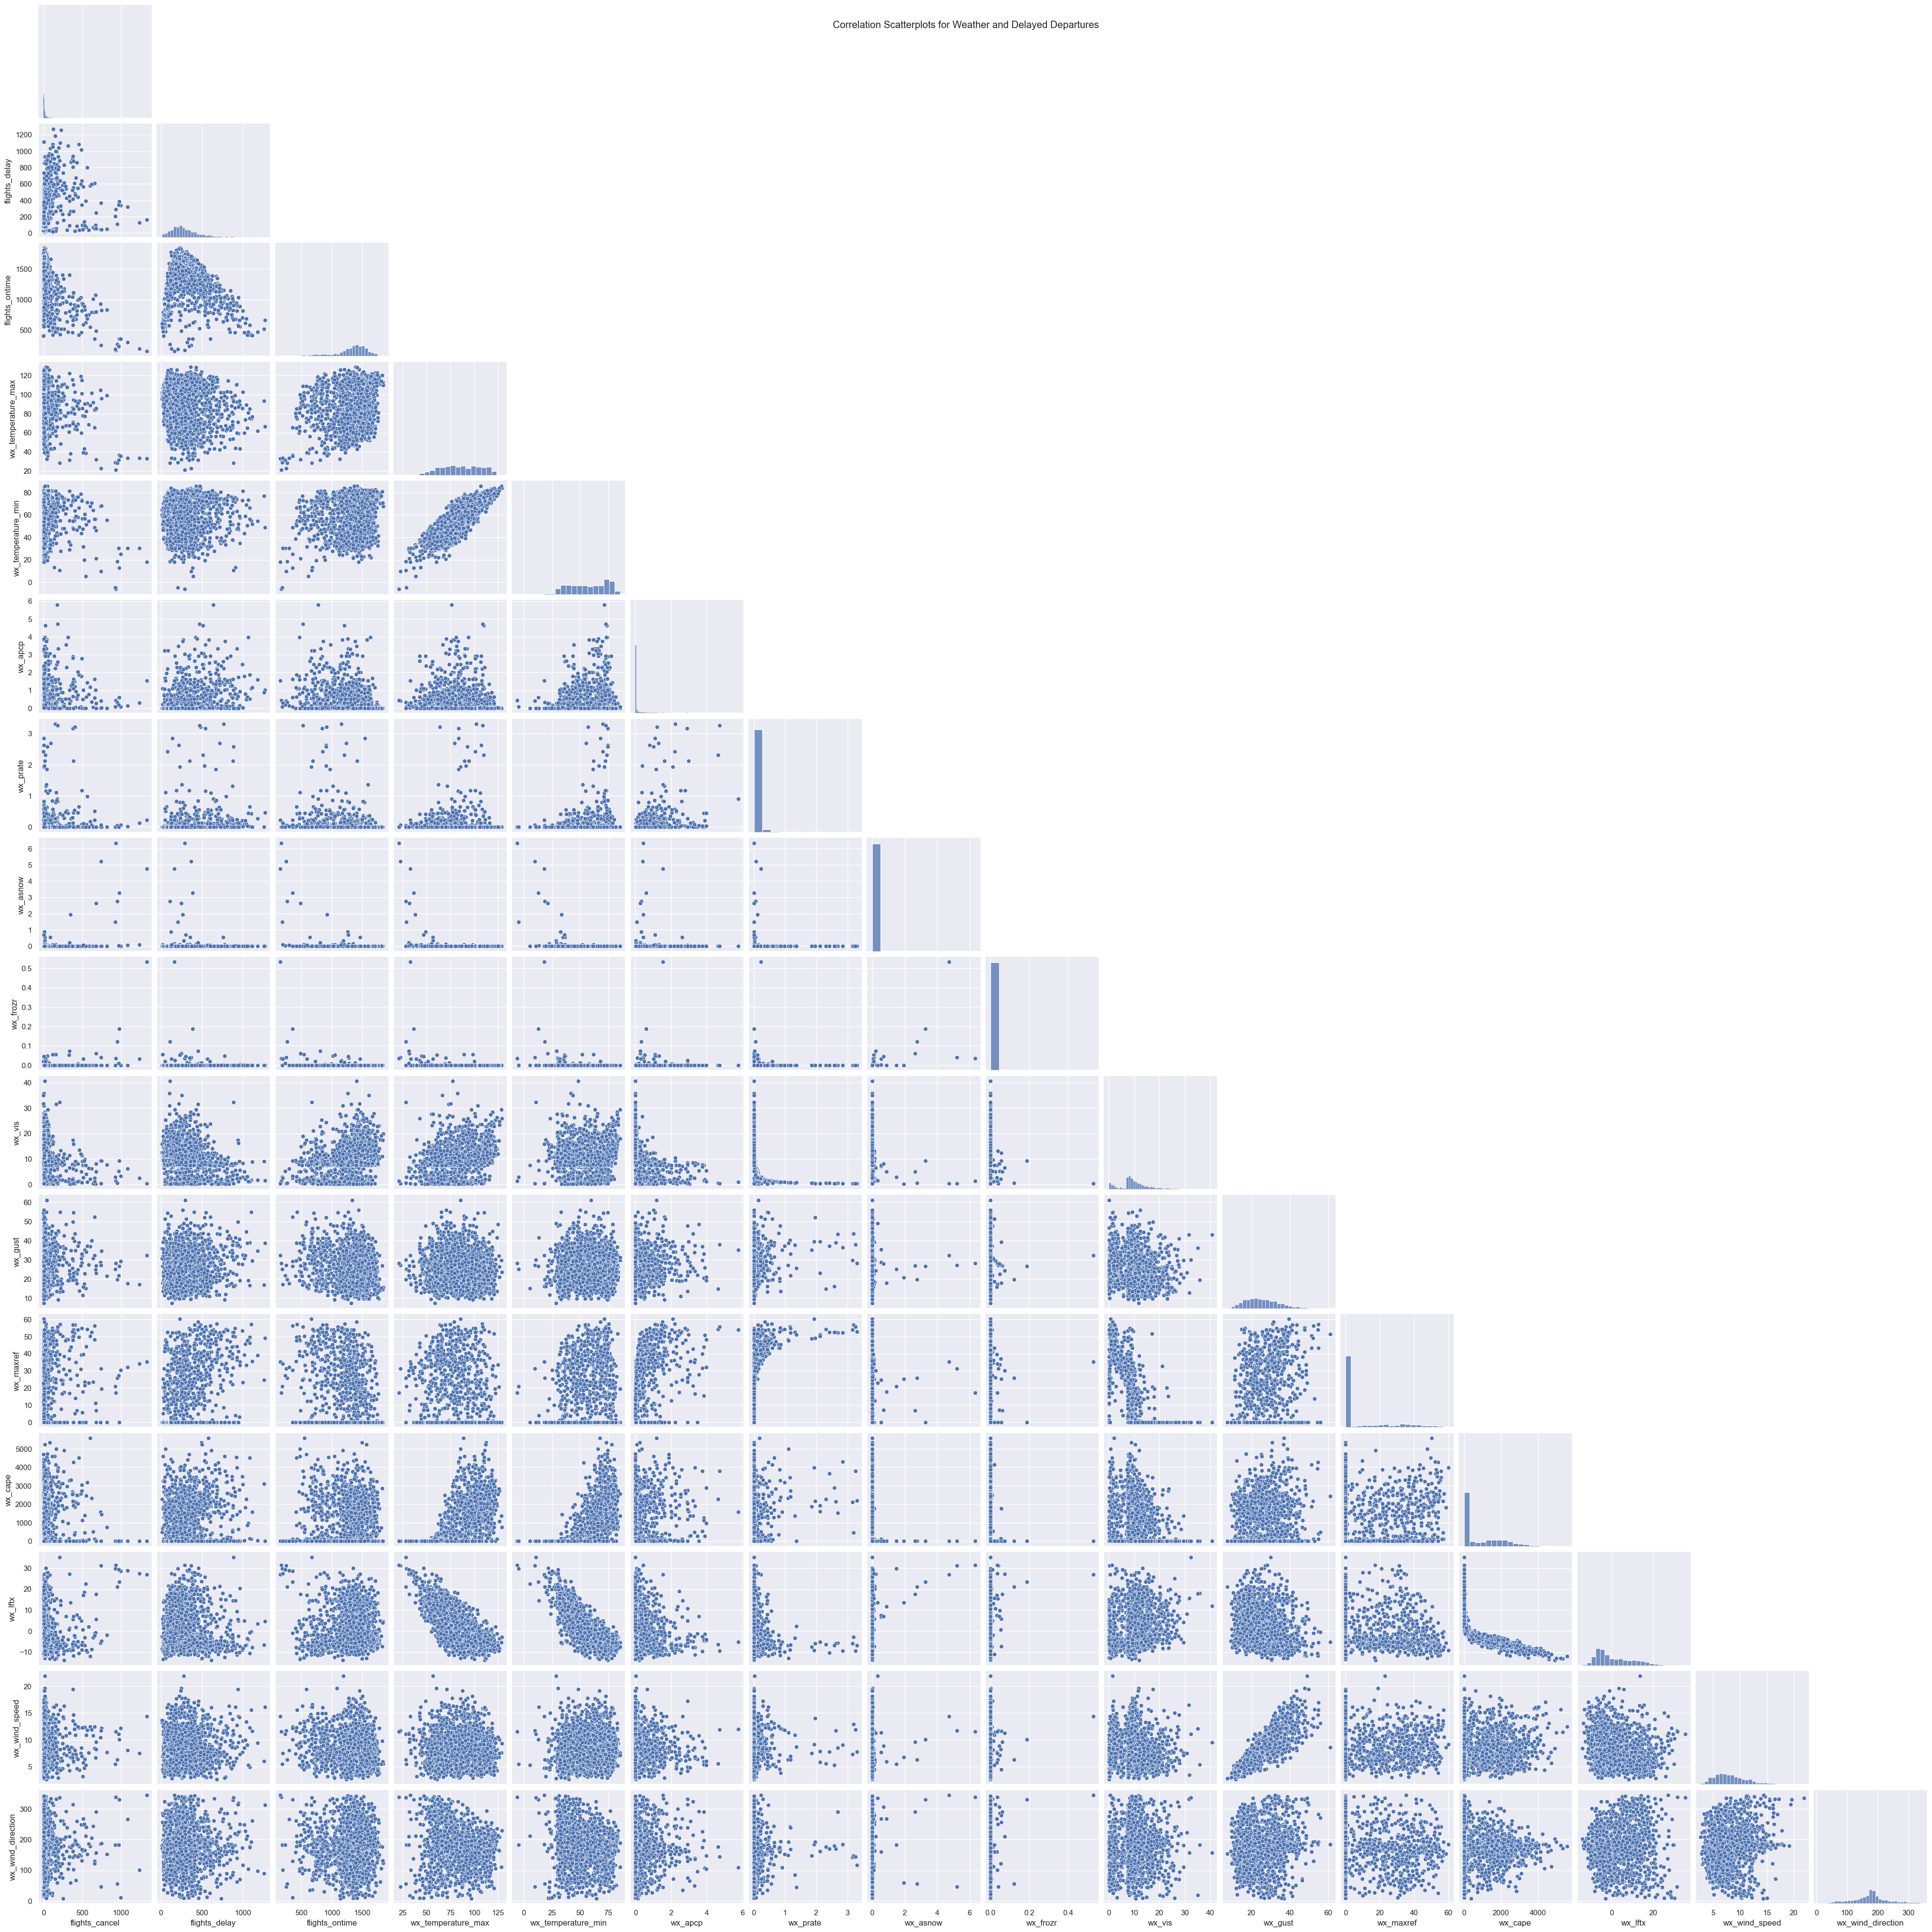

In [6]:
plt.figure(figsize=(10, 10))
sns.pairplot(df[['flights_cancel', 'flights_delay', 'flights_ontime'] + weather_cols], corner=True)
plt.suptitle('Correlation Scatterplots for Weather and Delayed Departures')
plt.show()